In [57]:
### Use Keras to predict prices of house ###
"""In this notebook, we aim to:
> Explore and Process the Data
> Build and Train our Neural Network
> Visualize Loss and Accuracy
> Add Regularization to our Neural Network"""

'In this notebook, we aim to:\n> Explore and Process the Data\n> Build and Train our Neural Network\n> Visualize Loss and Accuracy\n> Add Regularization to our Neural Network'

In [28]:
import pandas as pd
df = pd.read_csv('/Users/tonydiana/Downloads/housepricedata.csv')

In [29]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [30]:
dataset = df.values

In [31]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [32]:
X = dataset[:,0:10]

In [33]:
Y = dataset[:,10]

In [35]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [37]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [38]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 208us/step - loss: 0.6891 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.4612
Epoch 2/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.6769 - accuracy: 0.5020 - val_loss: 0.6807 - val_accuracy: 0.4658
Epoch 3/100
1022/1022 [==============================] - 0s 61us/step - loss: 0.6659 - accuracy: 0.5039 - val_loss: 0.6708 - val_accuracy: 0.4658
Epoch 4/100
1022/1022 [==============================] - 0s 42us/step - loss: 0.6548 - accuracy: 0.5323 - val_loss: 0.6612 - val_accuracy: 0.5342
Epoch 5/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.6445 - accuracy: 0.6624 - val_loss: 0.6533 - val_accuracy: 0.6438
Epoch 6/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.6354 - accuracy: 0.7231 - val_loss: 0.6464 - val_accuracy: 0.6941
Epoch 7/100
1022/1022 [==============================] - 0s 52us/step - loss

1022/1022 [==============================] - 0s 38us/step - loss: 0.3058 - accuracy: 0.8718 - val_loss: 0.3974 - val_accuracy: 0.8493
Epoch 57/100
1022/1022 [==============================] - 0s 42us/step - loss: 0.3045 - accuracy: 0.8699 - val_loss: 0.3938 - val_accuracy: 0.8493
Epoch 58/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.3018 - accuracy: 0.8708 - val_loss: 0.3909 - val_accuracy: 0.8539
Epoch 59/100
1022/1022 [==============================] - 0s 35us/step - loss: 0.3006 - accuracy: 0.8738 - val_loss: 0.3897 - val_accuracy: 0.8584
Epoch 60/100
1022/1022 [==============================] - 0s 36us/step - loss: 0.2982 - accuracy: 0.8718 - val_loss: 0.3924 - val_accuracy: 0.8493
Epoch 61/100
1022/1022 [==============================] - 0s 36us/step - loss: 0.2970 - accuracy: 0.8718 - val_loss: 0.3938 - val_accuracy: 0.8539
Epoch 62/100
1022/1022 [==============================] - 0s 38us/step - loss: 0.2952 - accuracy: 0.8718 - val_loss: 0.3868 - val_a

In [40]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 25us/step


0.8721461296081543

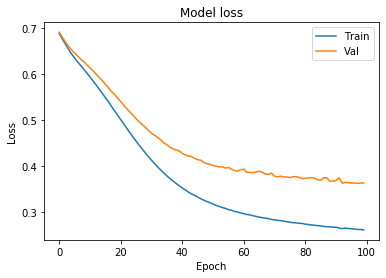

In [41]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

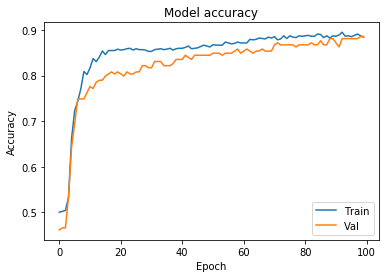

In [44]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [45]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [46]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4120 - accuracy: 0.8209 - val_loss: 0.4713 - val_accuracy: 0.8174
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3226 - accuracy: 0.8650 - val_loss: 0.4716 - val_accuracy: 0.8082
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2803 - accuracy: 0.8885 - val_loss: 0.4028 - val_accuracy: 0.8858
Epoch 4/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2712 - accuracy: 0.8885 - val_loss: 0.4104 - val_accuracy: 0.8128
Epoch 5/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2647 - accuracy: 0.8826 - val_loss: 0.3566 - val_accuracy: 0.8539
Epoch 6/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2584 - accuracy: 0.8894 - val_loss: 0.3258 - val_accuracy: 0.8858
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2507

Epoch 57/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1722 - accuracy: 0.9266 - val_loss: 0.3565 - val_accuracy: 0.8813
Epoch 58/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1579 - accuracy: 0.9295 - val_loss: 0.3582 - val_accuracy: 0.8950
Epoch 59/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1555 - accuracy: 0.9335 - val_loss: 0.3815 - val_accuracy: 0.8950
Epoch 60/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1480 - accuracy: 0.9413 - val_loss: 0.4290 - val_accuracy: 0.8767
Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1635 - accuracy: 0.9276 - val_loss: 0.3941 - val_accuracy: 0.8950
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1423 - accuracy: 0.9364 - val_loss: 0.4314 - val_accuracy: 0.8950
Epoch 63/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1579 - accuracy: 0.9354 - val_loss: 0.4575 -

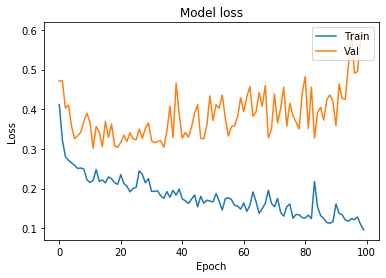

In [48]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

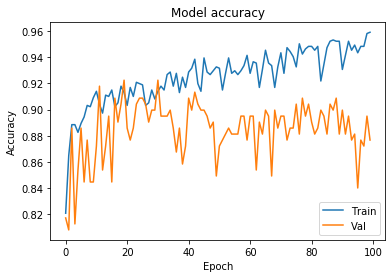

In [50]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [51]:
from keras.layers import Dropout
from keras import regularizers

In [52]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [53]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 14.2605 - accuracy: 0.5851 - val_loss: 3.9715 - val_accuracy: 0.5251
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.6937 - accuracy: 0.8023 - val_loss: 0.7242 - val_accuracy: 0.8356
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5362 - accuracy: 0.8679 - val_loss: 0.5413 - val_accuracy: 0.8721
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4852 - accuracy: 0.8855 - val_loss: 0.5435 - val_accuracy: 0.8676
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4924 - accuracy: 0.8630 - val_loss: 0.5350 - val_accuracy: 0.8676
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4666 - accuracy: 0.8708 - val_loss: 0.5229 - val_accuracy: 0.8584
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.464

Epoch 57/100
1022/1022 [==============================] - 2s 1ms/step - loss: 0.4338 - accuracy: 0.8933 - val_loss: 0.4602 - val_accuracy: 0.8721
Epoch 58/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4103 - accuracy: 0.9002 - val_loss: 0.4600 - val_accuracy: 0.8813
Epoch 59/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4443 - accuracy: 0.8806 - val_loss: 0.4953 - val_accuracy: 0.8356
Epoch 60/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4188 - accuracy: 0.8914 - val_loss: 0.4751 - val_accuracy: 0.8721
Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4234 - accuracy: 0.8885 - val_loss: 0.4871 - val_accuracy: 0.8630
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4247 - accuracy: 0.8953 - val_loss: 0.5372 - val_accuracy: 0.8311
Epoch 63/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4247 - accuracy: 0.8904 - val_loss: 0.5152 -

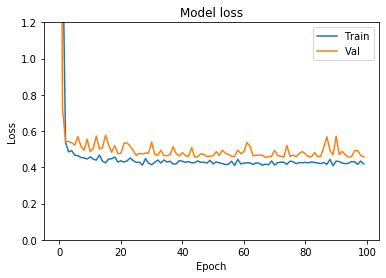

In [55]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

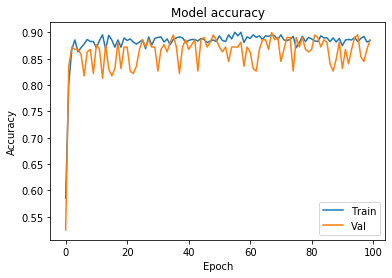

In [56]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
"""To deal with overfitting, we can choose two strategies:

** L2 Regularization
** Dropout

If we visualize the training / validation loss and accuracy, we can see that 
these additions have helped deal with overfitting!"""